## Module 2 Coding Assignment: Normality and Serial Autocorrelation of various returns labels.

We will explore creating various types of returns labels using tick data.

1. **We will explore creating various types of returns labels using tick data.**

**Solution**:
Data-based chart intervals allow traders to view price action from various data intervals instead of time intervals. Tick, volume, and range bar charts are examples of data-based chart intervals. These charts print a bar at the close of a specified data interval, regardless of how much time has passed.


2.	**What does “dollar bar” mean? Does it mean that the prices have moved a certain fixed dollar value in each bar?**

**Solution**:
Dollar bars are formed by sampling an observation every time a pre-defined market value is exchanged.
1.	it makes sense sampling bars in terms of dollar value exchanged, rather than ticks or volume, particularly when the analysis involves significant price fluctuations. This point can be verified empirically.
2.	A second argument that makes dollar bars more interesting than time, tick, or volume bars is that the number of outstanding shares often changes multiple times over the course of a security’s life, as a result of corporate actions.Dollar bars tend to be robust in the face of those actions.


3.	**Compute the serial auto-correlation (at lag=1) of returns. Which type of bars has the highest serial auto-correlation? The lowest? Which trading strategy do you expect willbenefit from the highest? From the lowest?**

In [ ]:
%cd /content/

/content


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
#%matplotlib inline

In [ ]:
time_bars = pd.read_csv('AAPL_1Min.csv', index_col=0, parse_dates=True)
time_bars=time_bars[time_bars.volume!=0]
dollar_bars = pd.read_csv('AAPL_dollar_bars_3300000.csv', index_col=0, parse_dates=True)
volume_bars = pd.read_csv('AAPL_volume_bars_22000.csv', index_col=0, parse_dates=True)
tick_bars = pd.read_csv('AAPL_tick_bars_100.csv', index_col=0, parse_dates=True)

In [ ]:
# Compute serial correlation of returns for the four bar types
time_returns = np.log(time_bars['price']).diff().dropna()
tick_returns = np.log(tick_bars['close']).diff().dropna()
volume_returns = np.log(volume_bars['close']).diff().dropna()
dollar_returns = np.log(dollar_bars['close']).diff().dropna()

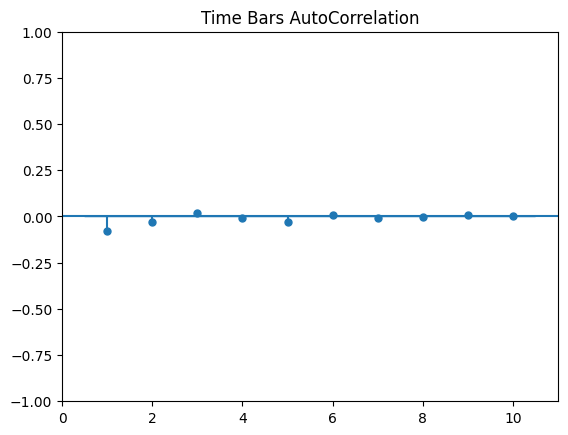

In [ ]:
plot_acf(time_returns, lags=10, zero=False)
plt.title('Time Bars AutoCorrelation')
plt.show()

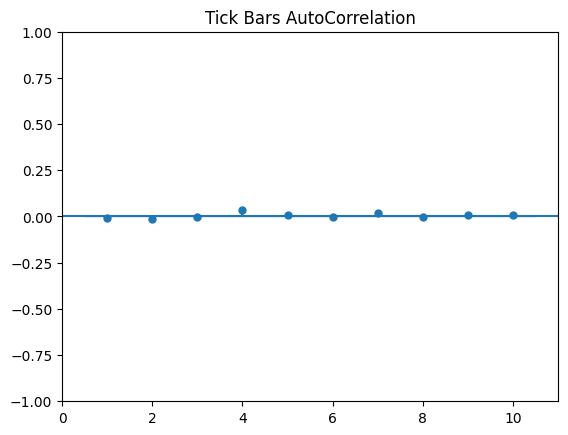

In [ ]:
plot_acf(tick_returns, lags=10, zero=False)
plt.title('Tick Bars AutoCorrelation')
plt.show()

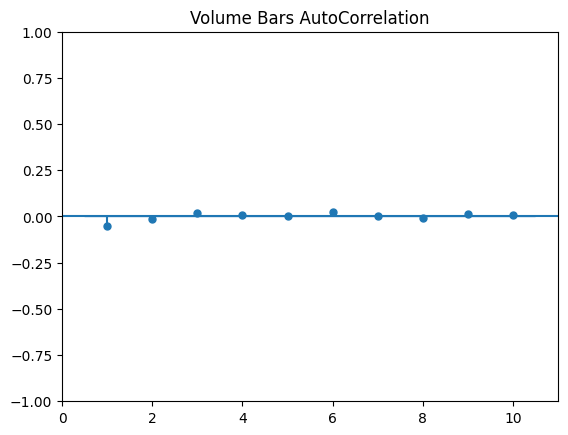

In [ ]:
plot_acf(volume_returns, lags=10, zero=False)
plt.title('Volume Bars AutoCorrelation')
plt.show()

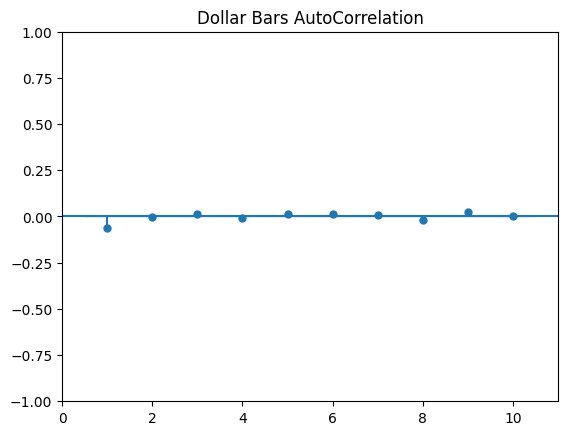

In [ ]:
plot_acf(dollar_returns, lags=10, zero=False)
plt.title('Dollar Bars AutoCorrelation')
plt.show()

**Solution**:
At lag =1 time bars has the lowest serial auto correlation while the tick bars have the highest value .

A rising autocorrelation means that the market is getting trendy, thus a rising autocorrelation would be the perfect environment for a trend following strategy. Trend following strategies are easy to trade, but only make sense when the market is trending. Thus autocorrelation good way of finding if the market is in the right phase to apply a trend following strategy.

While the lowest autocorrelation in the data would be the strategies that dont rely on the market trend could be used.


4. **Which type of return bars has the most normal (Gaussian) distribution of returns? The least?**

In [ ]:
from scipy import stats

In [ ]:
stats.jarque_bera(time_returns)

SignificanceResult(statistic=11611521966.044731, pvalue=0.0)

In [ ]:
stats.jarque_bera(tick_returns)

SignificanceResult(statistic=6317639448.714689, pvalue=0.0)

In [ ]:
stats.jarque_bera(volume_returns)

SignificanceResult(statistic=3172593541.400863, pvalue=0.0)

In [ ]:
stats.jarque_bera(dollar_returns)

SignificanceResult(statistic=6371090705.625416, pvalue=0.0)

In [ ]:
## Apply the Jarque-Bera normality test on returns from the three bar types.
print('Test Statistics:')
print('Time:', '\t', int(stats.jarque_bera(time_returns)[0]))
print('Tick:', '\t', int(stats.jarque_bera(tick_returns)[0]))
print('Volume: ', int(stats.jarque_bera(volume_returns)[0]))
print('Dollar: ', int(stats.jarque_bera(dollar_returns)[0]))

Test Statistics:
Time: 	 11611521966
Tick: 	 6317639448
Volume:  3172593541
Dollar:  6371090705


**Solution**:

The smaller the value of the Jarque-Bera test the more normal is the dataset. We can find that volume bars show the most normal distribution of returns according to this test. When we do plot the graph we find that time bars have a significantly huge difference when comparing with normal returns while the other three 'tick','volume' and 'dollar' show pretty much good amount of normal distribution of returns


In [ ]:
# Calculate the differences
time_diff = time_returns
tick_diff = tick_returns
volume_diff = volume_returns
dollar_diff = dollar_returns

In [ ]:
# Standardize the data
time_standard = (time_diff - time_diff.mean()) / time_diff.std()
tick_standard = (tick_diff - tick_diff.mean()) / tick_diff.std()
volume_standard = (volume_diff - volume_diff.mean()) / volume_diff.std()
dollar_standard = (dollar_diff - dollar_diff.mean()) / dollar_diff.std()

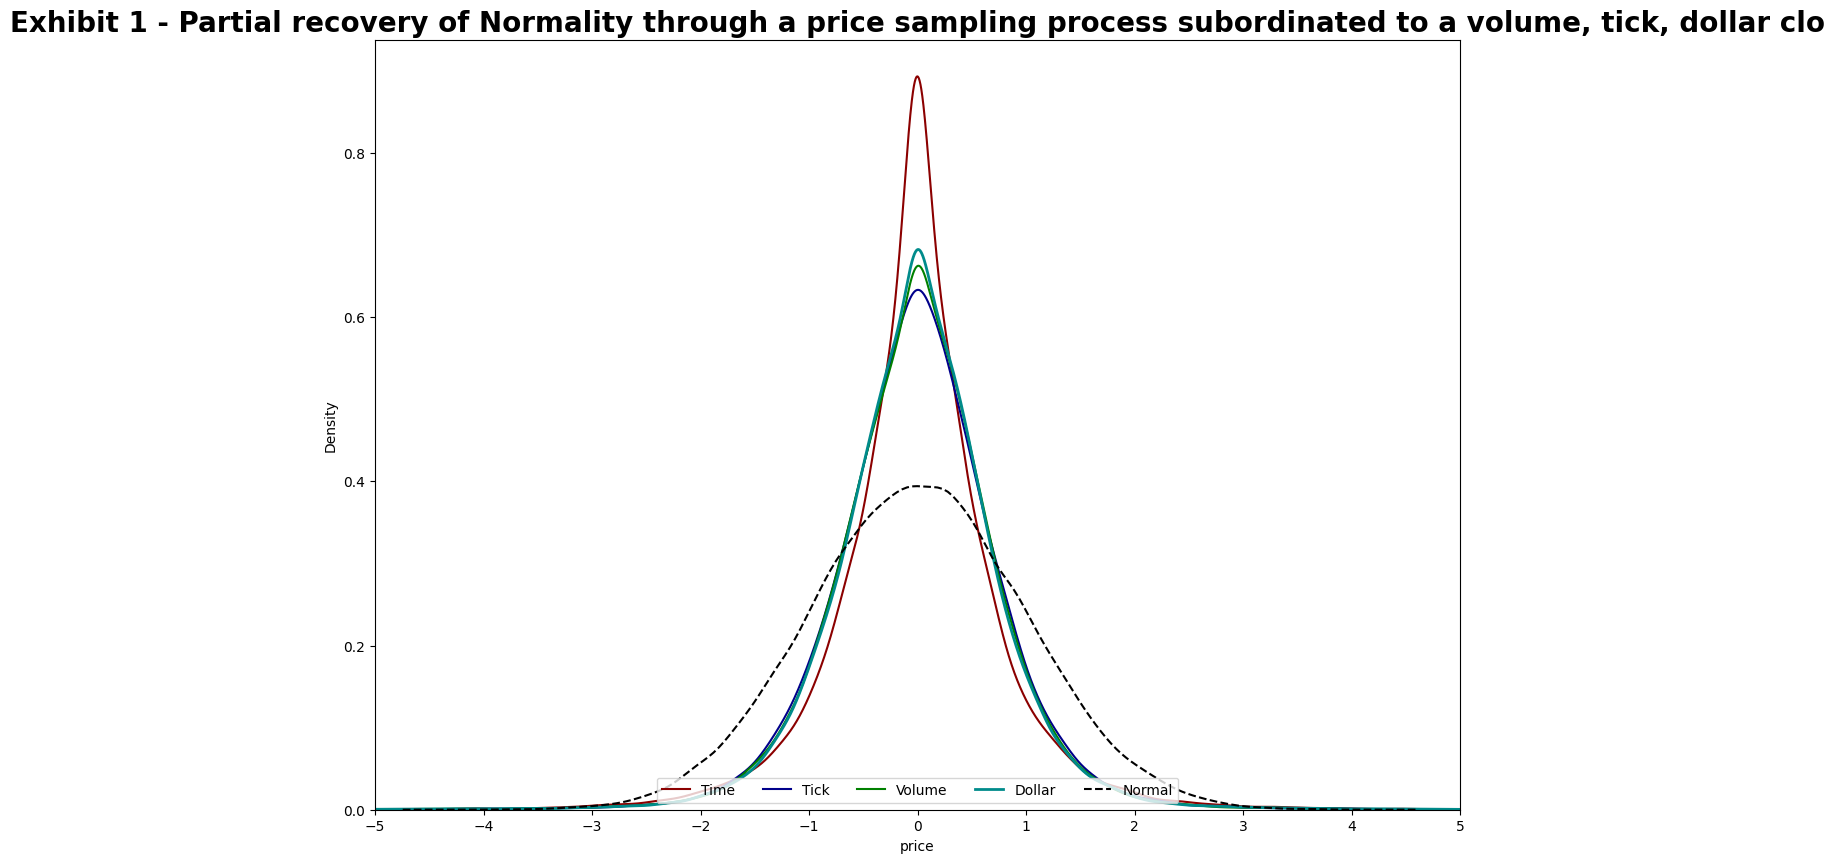

In [ ]:
# Plot the Distributions
plt.figure(figsize=(14,10))
sns.kdeplot(time_standard, label="Time", color='darkred',gridsize=100000)
sns.kdeplot(tick_standard, label="Tick", color='darkblue',gridsize=100000)
sns.kdeplot(volume_standard, label="Volume", color='green',gridsize=100000)
sns.kdeplot(dollar_standard, label="Dollar", linewidth=2, color='darkcyan',gridsize=100000)
sns.kdeplot(np.random.normal(size=len(time_returns)), label="Normal", color='black', linestyle="--")
plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title('Exhibit 1 - Partial recovery of Normality through a price sampling process subordinated to a volume, tick, dollar clo',loc='center', fontsize=20, fontweight="bold")
plt.xlim(-5, 5)
plt.show()

5. **Download the raw tick data for AAPL. Construct the “order flow” from these data. Order flow as found to be an important driver of future returns. See Chan, 2017, Machine Trading, Chapter 6.**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
volume_bars = pd.read_csv('AAPL_volume_bars_22000.csv', index_col=0, parse_dates=True)
volume_bars.head()

,open,high,low,close,volume
date_time,,,,,
2019-01-02 05:02:28,154.40,154.70,153.01,154.69,22012
2019-01-02 06:59:49,154.69,154.70,154.10,154.46,22063
2019-01-02 07:18:04,154.46,155.18,154.46,155.18,22751
2019-01-02 07:33:47,155.18,155.35,154.80,154.83,22073
2019-01-02 07:58:04,154.83,155.00,154.50,154.60,22244


In [ ]:
lookback = 100
numRows = volume_bars.shape[0]
# buy_ordflow is the fraction of order flow due to buy orders .
# sell_ordflow is the fraction of order flow due to sell orders.
column_names=['buy_ordflow','sell_ordflow']
# issue with mlfinl lab coz empty df bug is there in the version of pandas which is compatible with mflinlab
orderflow = pd.DataFrame(index=range(numRows),columns=column_names)
orderflow['datetime'] = volume_bars.index
print(orderflow.head())

  buy_ordflow sell_ordflow            datetime
0         NaN          NaN 2019-01-02 05:02:28
1         NaN          NaN 2019-01-02 06:59:49
2         NaN          NaN 2019-01-02 07:18:04
3         NaN          NaN 2019-01-02 07:33:47
4         NaN          NaN 2019-01-02 07:58:04


In [ ]:
volume_bars.shape

(118306, 5)

In [ ]:
orderflow.shape

(118306, 3)

In [ ]:
from scipy import stats

In [ ]:
for t in range(lookback+1,numRows):
  deltaPrice = volume_bars.iloc[t,3] - volume_bars.iloc[t-1,3]
  myDeltaPrice = volume_bars.iloc[t-lookback:t-1,3].diff()
  myDeltaPrice = myDeltaPrice.replace({np.nan: None})
  orderflow.iloc[t,0]= stats.norm.cdf(deltaPrice, loc = 0, scale = myDeltaPrice.std())
  orderflow.iloc[t,1] = 1- orderflow.iloc[t,0]

In [ ]:
orderflow.head()

,buy_ordflow,sell_ordflow,datetime
0,NaN,NaN,2019-01-02 05:02:28
1,NaN,NaN,2019-01-02 06:59:49
2,NaN,NaN,2019-01-02 07:18:04
3,NaN,NaN,2019-01-02 07:33:47
4,NaN,NaN,2019-01-02 07:58:04


In [ ]:
# Since the first 100 lookback periods orderflow isnt calcuated
# we drop those values since these would be used to calculate the orderflow for the next datapoint(100 + 1)
orderflow.tail()

,buy_ordflow,sell_ordflow,datetime
118301,0.5,0.5,2019-06-14 16:00:05
118302,0.5,0.5,2019-06-14 16:00:09
118303,0.132393,0.867607,2019-06-14 16:02:48
118304,0.869826,0.130174,2019-06-14 16:19:48
118305,0.004115,0.995885,2019-06-14 17:19:27


In [ ]:
orderflow.dropna(inplace=True)

In [ ]:
orderflow.index = orderflow['datetime']
orderflow.drop(['datetime'], axis=1)

,buy_ordflow,sell_ordflow
datetime,,
2019-01-02 09:43:39,0.560342,0.439658
2019-01-02 09:43:51,0.550997,0.449003
2019-01-02 09:44:04,0.377215,0.622785
2019-01-02 09:44:15,0.070583,0.929417
2019-01-02 09:44:24,0.77487,0.22513
...,...,...
2019-06-14 16:00:05,0.5,0.5
2019-06-14 16:00:09,0.5,0.5
2019-06-14 16:02:48,0.132393,0.867607


**Tick Rule approach to compute the orderflow for the AAPL tick data.**

In [ ]:
raw_tick = pd.read_pickle("AAPL_raw_tick_data.bz2")
raw_tick.head()

,date_time,price,volume
0,2019-01-02 04:00:00,154.4,260
1,2019-01-02 04:00:00,154.4,242
2,2019-01-02 04:00:00,154.4,218
3,2019-01-02 04:00:00,154.4,100
4,2019-01-02 04:00:00,154.4,200


In [ ]:
# We set a column with the prev price and then do the comparison
# Wherever the price is same as the prev price we take the orderflow direction just above the row with a valid value of 'B or S'
raw_tick['prev_price'] = raw_tick['price'].shift(1)
raw_tick['direction'] = np.nan
raw_tick.loc[raw_tick['price']>raw_tick['prev_price'],'direction'] = 'B'
raw_tick.loc[raw_tick['price']<raw_tick['prev_price'],'direction'] = 'S'
raw_tick.head()

,date_time,price,volume,prev_price,direction
0,2019-01-02 04:00:00,154.4,260,NaN,NaN
1,2019-01-02 04:00:00,154.4,242,154.4,NaN
2,2019-01-02 04:00:00,154.4,218,154.4,NaN
3,2019-01-02 04:00:00,154.4,100,154.4,NaN
4,2019-01-02 04:00:00,154.4,200,154.4,NaN


In [ ]:
raw_tick.head(20)

,date_time,price,volume,prev_price,direction
0,2019-01-02 04:00:00,154.40,260,NaN,NaN
1,2019-01-02 04:00:00,154.40,242,154.40,NaN
2,2019-01-02 04:00:00,154.40,218,154.40,NaN
3,2019-01-02 04:00:00,154.40,100,154.40,NaN
4,2019-01-02 04:00:00,154.40,200,154.40,NaN
5,2019-01-02 04:00:04,154.00,100,154.40,S
6,2019-01-02 04:00:12,153.01,100,154.00,S
7,2019-01-02 04:00:12,153.01,200,153.01,NaN
8,2019-01-02 04:00:12,153.01,100,153.01,NaN
9,2019-01-02 04:00:30,153.88,100,153.01,B


In [ ]:
# Let's remove the first Nan rows in the direction column since we dont have any
# previous value of ordflow direction which we can forward fill
raw_tick_updated = raw_tick.iloc[5:,:]
raw_tick_updated.head(10)

,date_time,price,volume,prev_price,direction
5,2019-01-02 04:00:04,154.00,100,154.40,S
6,2019-01-02 04:00:12,153.01,100,154.00,S
7,2019-01-02 04:00:12,153.01,200,153.01,NaN
8,2019-01-02 04:00:12,153.01,100,153.01,NaN
9,2019-01-02 04:00:30,153.88,100,153.01,B
10,2019-01-02 04:00:32,153.90,400,153.88,B
11,2019-01-02 04:00:56,154.00,200,153.90,B
12,2019-01-02 04:00:56,154.00,300,154.00,NaN
13,2019-01-02 04:01:50,154.00,100,154.00,NaN
14,2019-01-02 04:03:26,154.01,100,154.00,B


In [ ]:
raw_tick_updated.isna().sum()

date_time           0
price               0
volume              0
prev_price          0
direction     7695931
dtype: int64

In [ ]:
raw_tick_updated.fillna(method='ffill',inplace=True)

<ipython-input-42-f13a9fe62630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tick_updated.fillna(method='ffill',inplace=True)


In [ ]:
raw_tick_updated.head(10)

,date_time,price,volume,prev_price,direction
5,2019-01-02 04:00:04,154.00,100,154.40,S
6,2019-01-02 04:00:12,153.01,100,154.00,S
7,2019-01-02 04:00:12,153.01,200,153.01,S
8,2019-01-02 04:00:12,153.01,100,153.01,S
9,2019-01-02 04:00:30,153.88,100,153.01,B
10,2019-01-02 04:00:32,153.90,400,153.88,B
11,2019-01-02 04:00:56,154.00,200,153.90,B
12,2019-01-02 04:00:56,154.00,300,154.00,B
13,2019-01-02 04:01:50,154.00,100,154.00,B
14,2019-01-02 04:03:26,154.01,100,154.00,B


In [ ]:
# Orderflow is signed value based on the buy(+v - where v is the volume of trade) / sell (-v )
raw_tick_updated.loc[raw_tick_updated['direction']=='B','Ordflow']=raw_tick_updated['volume']
raw_tick_updated.loc[raw_tick_updated['direction']=='S','Ordflow']=-1*raw_tick_updated['volume']


<ipython-input-44-1523c674fa20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tick_updated.loc[raw_tick_updated['direction']=='B','Ordflow']=raw_tick_updated['volume']


In [ ]:
raw_tick_updated.head(10)

,date_time,price,volume,prev_price,direction,Ordflow
5,2019-01-02 04:00:04,154.00,100,154.40,S,-100.0
6,2019-01-02 04:00:12,153.01,100,154.00,S,-100.0
7,2019-01-02 04:00:12,153.01,200,153.01,S,-200.0
8,2019-01-02 04:00:12,153.01,100,153.01,S,-100.0
9,2019-01-02 04:00:30,153.88,100,153.01,B,100.0
10,2019-01-02 04:00:32,153.90,400,153.88,B,400.0
11,2019-01-02 04:00:56,154.00,200,153.90,B,200.0
12,2019-01-02 04:00:56,154.00,300,154.00,B,300.0
13,2019-01-02 04:01:50,154.00,100,154.00,B,100.0
14,2019-01-02 04:03:26,154.01,100,154.00,B,100.0
